In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets as datasets

In [2]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('dark_background')

x.shape= (500, 2), y.shape= (500,)
Label: 0	 Counts: qt_label= np.int64(250)
Label: 1	 Counts: qt_label= np.int64(250)


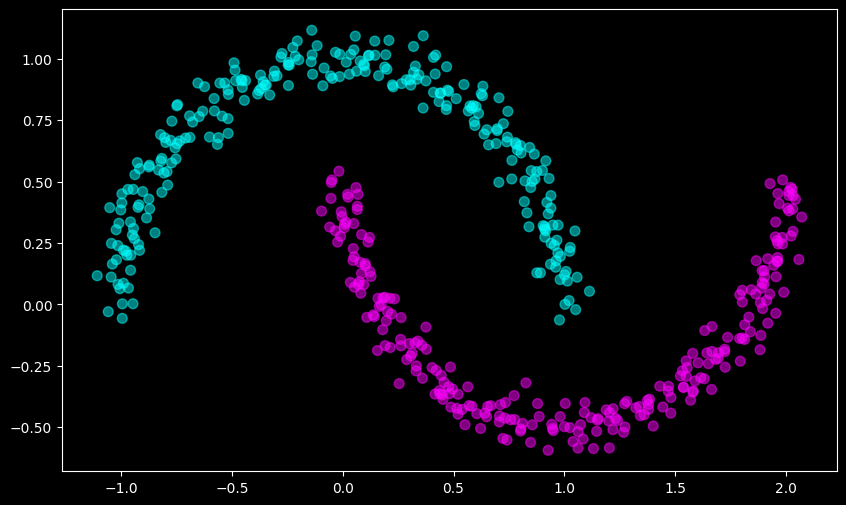

In [3]:
x,y = datasets.make_moons(n_samples=500,noise=0.05)
x.shape,y.shape

print(f'{x.shape= }, {y.shape= }')

pd.DataFrame({'x_1':x[:,0],'x_2':x[:,1],'y':y})

unique = np.unique(y, return_counts=True)
for label,qt_label in zip(unique[0],unique[1]):
    print(f'Label: {label}\t Counts: {qt_label= }') 

plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.5,cmap='cool')


In [4]:
class NnModel:
    def __init__(self,x:np.ndarray,y:np.ndarray,hidden_neurons:int=10,output_neurons:int=2):
        np.random.seed(8)
        self.x = x
        self.y = y
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.input_neurons = self.x.shape[1]
        
        #inicializando pesos e bias
        #Xavier Initialization -> variancia dos pesos iguais em todas as camadas
        self.W1 = np.random.randn(self.input_neurons,self.hidden_neurons) / np.sqrt(self.input_neurons)
        self.B1 = np.zeros((1,self.hidden_neurons))
        self.W2 = np.random.randn(self.hidden_neurons,self.output_neurons) / np.sqrt(self.hidden_neurons)
        self.B2 = np.zeros((1,self.output_neurons))
        self.model_dict = {'W1': self.W1,'B1': self.B1,'W2': self.W2,'B2': self.B2}
        self.z1 = 0
        self.f1 = 0  
    def foward(self,x:np.ndarray) -> np.ndarray:
        #eq da reta
        self.z1 = x.dot(self.W1) + self.B1
        #função de ativação
        self.f1 = np.tanh(self.z1)
        #eq da reta 2
        z2 = self.f1.dot(self.W2) + self.B2

        exp_values = np.exp(z2)
        softmax = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return softmax
    def loss(self, softmax):
        #Cross Entropy - calcular a perda para classe correta
        predictions = np.zeros(self.y.shape[0]) 
        for i, correct_index in enumerate(self.y):
            predicted = softmax[i][correct_index]
            predictions[i] = predicted
        log_probs = -np.log(predictions)
        return log_probs/self.y.shape[0]
    def backpropagation(self,softmax:np.ndarray,learning_rate:float)->None:
        delta2 = np.copy(softmax)
        delta2[range(x.shape[0]),y] -= 1
        dW2 = (self.f1.T).dot(delta2)
        dB2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = delta2.dot(self.W2.T) * (1 - np.power(np.tanh(self.z1), 2 ))
        dW1 = (x.T).dot(delta1)
        dB1 = np.sum(delta1, axis=0, keepdims=True)
        
        #atualiando pesos e bias
        self.W1 -= learning_rate * dW1
        self.W2 -= learning_rate * dW2
        self.B1 -= learning_rate * dB1
        self.B2 -= learning_rate * dB2
        
    def fit(self,epochs:int,lr:float):
        for epoch in range(epochs):
            outputs= self.foward(self.x)
            loss = self.loss(outputs)
            self.backpropagation(outputs,lr)
            
            # Acuracia
            predictions = np.argmax(outputs, axis = 1)
            correct =(predictions == y).sum()
            accuracy = correct / y.shape[0]
            
            if int((epoch+1) % (epochs/10)) == 0:
                print(f'Epoch: {epoch+1}/{epochs} - Loss: {loss.mean()} - Accuracy: {accuracy:.3f}')    
        return predictions  

In [5]:
hidden_neurons = 10
output_neurons = 2
learning_rate = 0.001
epochs = 100

model = NnModel(x,y,hidden_neurons=hidden_neurons,output_neurons=output_neurons)
result = model.fit(epochs,learning_rate)


Epoch: 10/100 - Loss: 0.000845913889968636 - Accuracy: 0.788
Epoch: 20/100 - Loss: 0.0006608629114055342 - Accuracy: 0.846
Epoch: 30/100 - Loss: 0.0005626050740381486 - Accuracy: 0.876
Epoch: 40/100 - Loss: 0.0005085683987900364 - Accuracy: 0.888
Epoch: 50/100 - Loss: 0.0004721506517652472 - Accuracy: 0.892
Epoch: 60/100 - Loss: 0.00044230541420818044 - Accuracy: 0.904
Epoch: 70/100 - Loss: 0.00041466562673772437 - Accuracy: 0.914
Epoch: 80/100 - Loss: 0.0003875407151022406 - Accuracy: 0.916
Epoch: 90/100 - Loss: 0.0003605035482493127 - Accuracy: 0.926
Epoch: 100/100 - Loss: 0.00033374477014471777 - Accuracy: 0.936
